# Exploration

Les données utilisées dans ce projet dans issue du bllog "Medium". Le dataset contient environ 1300 articles leur titre correspondant.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [3]:
import tensorflow as tf

# Vérifier la présence de GPU
if tf.test.gpu_device_name():
    print('GPU détecté')
else:
    print("Aucun GPU détecté")

2024-04-26 11:57:10.666140: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-26 11:57:10.692590: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 11:57:11.187037: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU détecté


2024-04-26 11:57:11.475588: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-26 11:57:11.496051: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-26 11:57:11.496181: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
data = pd.read_csv("medium.csv")
data.shape

(1391, 2)

In [5]:
data.head(5)

,Title,Text
0,A Beginner’s Guide to Word Embedding with Gens...,1. Introduction of Word2vec\n\nWord2vec is one...
1,Hands-on Graph Neural Networks with PyTorch & ...,"In my last article, I introduced the concept o..."
2,How to Use ggplot2 in Python,Introduction\n\nThanks to its strict implement...
3,Databricks: How to Save Data Frames as CSV Fil...,Photo credit to Mika Baumeister from Unsplash\...
4,A Step-by-Step Implementation of Gradient Desc...,A Step-by-Step Implementation of Gradient Desc...


In [6]:
data['text_char'] = data['Text'].apply(len)

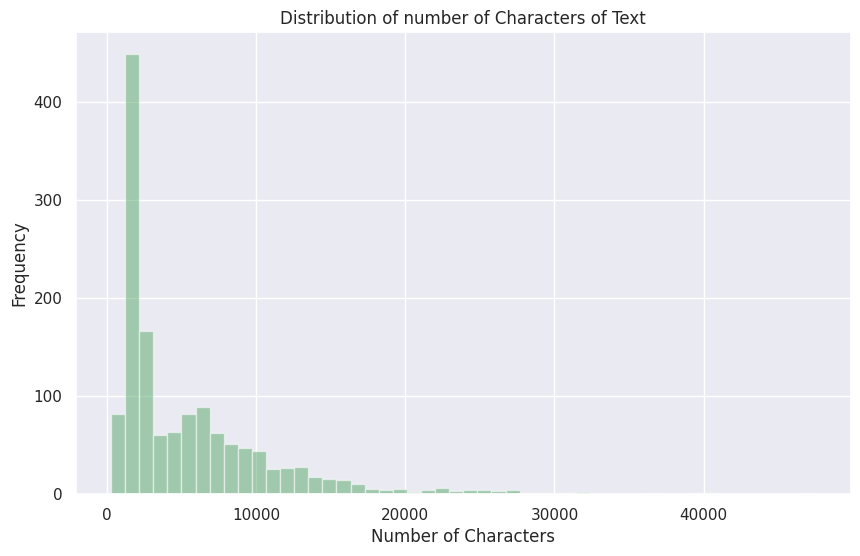

In [7]:
plt.figure(figsize=(10,6))
plt.hist(data['text_char'], bins=50, alpha=0.5, color='g')
plt.title('Distribution of number of Characters of Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
def count_word_text(text):
    count = len(text.split())
    return count
data['Len_text']=data['Text'].apply(count_word_text)

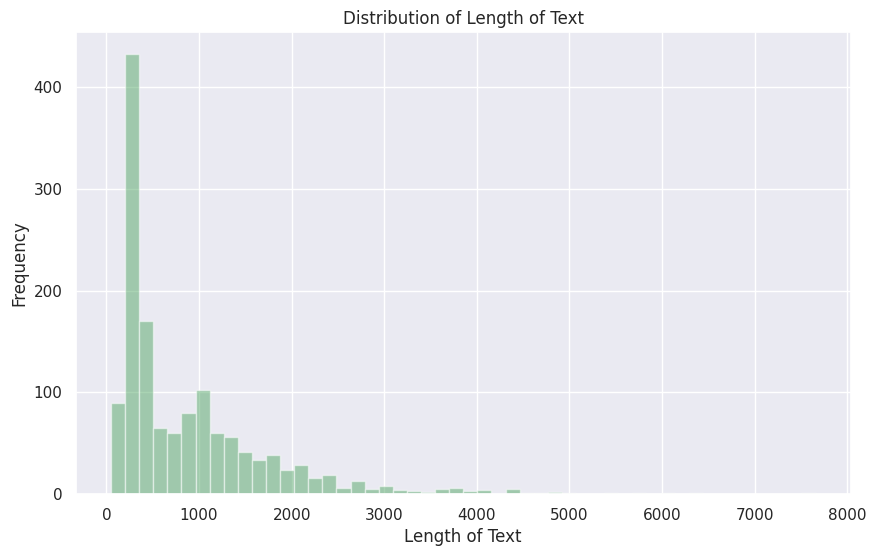

In [9]:
plt.figure(figsize=(10,6))
plt.hist(data['Len_text'], bins=50, alpha=0.5, color='g')
plt.title('Distribution of Length of Text')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
threshold = 2048
mask = data['Len_text'] > threshold
percentage = (mask.sum() / data['Len_text'].count()) * 100


print(f"Le pourcentage de documents de longueur supérieure à {threshold} est : {percentage}%")

Le pourcentage de documents de longueur supérieure à 2048 est : 9.561466570812366%


In [11]:
threshold = 1000
mask = data['Len_text'] > threshold
percentage = (mask.sum() / data['Len_text'].count()) * 100


print(f"Le pourcentage de documents de longueur supérieure à {threshold} est : {percentage}%")

Le pourcentage de documents de longueur supérieure à 1000 est : 33.64485981308411%


In [12]:
data['Len_title']= data['Title'].apply(count_word_text)

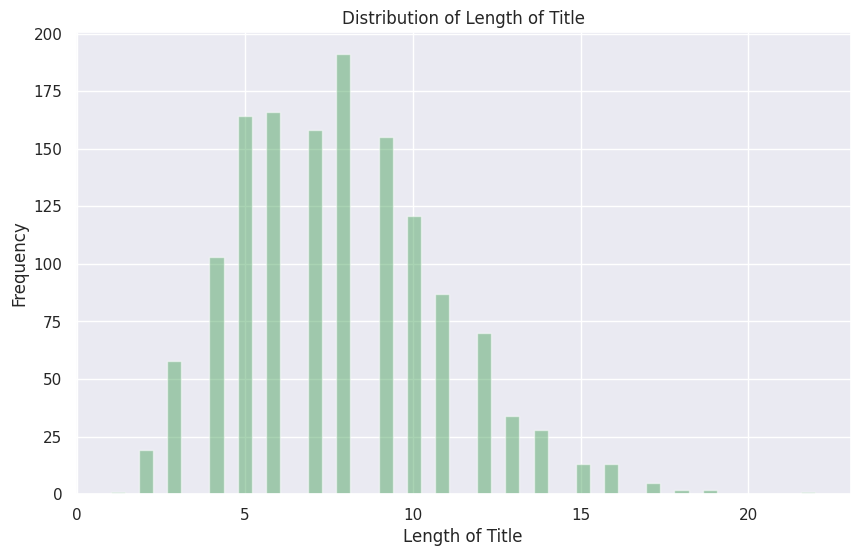

In [13]:
plt.figure(figsize=(10,6))
plt.hist(data['Len_title'], bins=50, alpha=0.5, color='g')
plt.title('Distribution of Length of Title')
plt.xlabel('Length of Title')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
def clean_text(text):
    """Clean text : remove HTML tags and other non-text elements"""
    text = text.lower()
    soup = BeautifulSoup(text, 'html.parser')
    cleaned_text = soup.get_text(separator=' ')
    cleaned_text = cleaned_text.replace('\n', ' ')
    cleaned_text = re.sub(r'^\d+\.\s', '', cleaned_text)
    return cleaned_text

import re

In [25]:
data['Text_clean']= data['Text'].apply(clean_text)

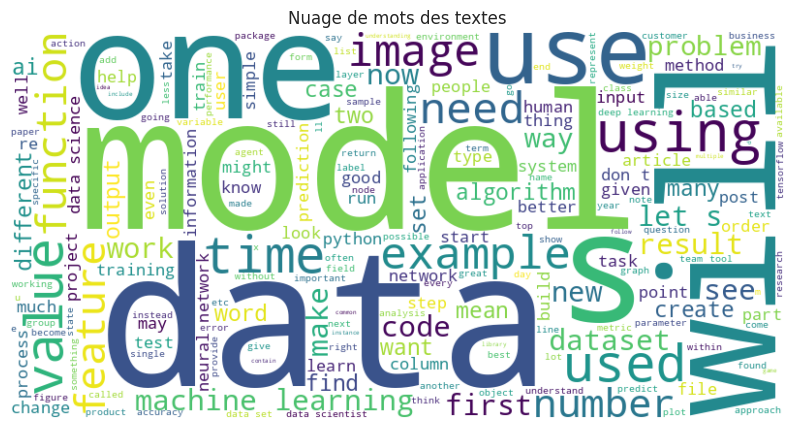

In [26]:
# Création d'un nuage de mots
text = ' '.join(data['Text_clean'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Visualisation du nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des textes')
plt.show()

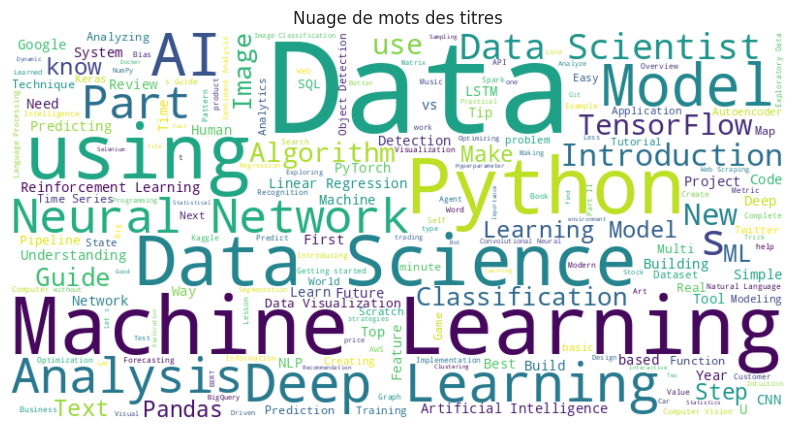

In [27]:
# Création d'un nuage de mots
text = ' '.join(data['Title'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Visualisation du nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des titres')
plt.show()

In [28]:
def tokenizer_fct(text):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text)
    return word_tokens

In [29]:
data['Text_tokens'] = data['Text_clean'].apply(tokenizer_fct)

In [30]:
data.head(5)

,Title,Text,text_char,Len_text,Len_title,Text_clean,Text_tokens
0,A Beginner’s Guide to Word Embedding with Gens...,1. Introduction of Word2vec\n\nWord2vec is one...,10559,1489,10,introduction of word2vec word2vec is one of t...,"[introduction, of, word2vec, word2vec, is, one..."
1,Hands-on Graph Neural Networks with PyTorch & ...,"In my last article, I introduced the concept o...",829,139,9,"in my last article, i introduced the concept o...","[in, my, last, article, i, introduced, the, co..."
2,How to Use ggplot2 in Python,Introduction\n\nThanks to its strict implement...,5656,953,6,introduction thanks to its strict implementat...,"[introduction, thanks, to, its, strict, implem..."
3,Databricks: How to Save Data Frames as CSV Fil...,Photo credit to Mika Baumeister from Unsplash\...,1784,280,13,photo credit to mika baumeister from unsplash ...,"[photo, credit, to, mika, baumeister, from, un..."
4,A Step-by-Step Implementation of Gradient Desc...,A Step-by-Step Implementation of Gradient Desc...,4797,737,8,a step-by-step implementation of gradient desc...,"[a, step, by, step, implementation, of, gradie..."


In [31]:
w = []
for i in range(len(data)):
    w.append(data['Text_tokens'][i])

In [32]:
words = []
for t in w:
     words += t
# utiliser counter pour compter les mots du corpus
freq_totale = Counter(words)
# Extraire les 50 mots les plus fréquents et leurs fréquences
print(f"Les 50 mots plus fréquents du corpus :\n{np.array(freq_totale.most_common(50))}")

Les 50 mots plus fréquents du corpus :
[['the' '72405']
 ['to' '36759']
 ['of' '32065']
 ['a' '29731']
 ['and' '27965']
 ['in' '21812']
 ['is' '21127']
 ['that' '14164']
 ['for' '13602']
 ['we' '12725']
 ['this' '11549']
 ['it' '11514']
 ['data' '11248']
 ['you' '9629']
 ['are' '9243']
 ['with' '8922']
 ['as' '8844']
 ['on' '8444']
 ['i' '8320']
 ['be' '8054']
 ['can' '7962']
 ['s' '6482']
 ['from' '5849']
 ['model' '5718']
 ['by' '5577']
 ['have' '5316']
 ['will' '5267']
 ['an' '5106']
 ['or' '5103']
 ['not' '4630']
 ['if' '4133']
 ['1' '3920']
 ['which' '3887']
 ['but' '3828']
 ['at' '3807']
 ['our' '3771']
 ['0' '3738']
 ['more' '3584']
 ['learning' '3583']
 ['one' '3431']
 ['your' '3426']
 ['how' '3414']
 ['all' '3302']
 ['what' '3056']
 ['use' '3027']
 ['using' '2974']
 ['t' '2946']
 ['so' '2933']
 ['there' '2879']
 ['some' '2688']]


In [33]:
def remove_stop_word(list_words):
    """ Remove stop words from text """
    #     stop_w = set(stopwords.words('english'))
    stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

In [34]:
# Suppression des stop words
data['Text_tokens_clean'] = data['Text_tokens'].apply(remove_stop_word)

In [35]:
w = []
for i in range(len(data)):
    w.append(data['Text_tokens_clean'][i])

In [36]:
words = []
for t in w:
     words += t
# utiliser counter pour compter les mots du corpus
freq_totale = Counter(words)
# Extraire les 50 mots les plus fréquents et leurs fréquences
print(f"Les 50 mots plus fréquents du corpus :\n{np.array(freq_totale.most_common(50))}")

Les 50 mots plus fréquents du corpus :
[['data' '11248']
 ['model' '5718']
 ['learning' '3583']
 ['one' '3431']
 ['use' '3027']
 ['using' '2974']
 ['time' '2682']
 ['used' '2285']
 ['also' '2268']
 ['like' '2234']
 ['function' '2153']
 ['machine' '2035']
 ['first' '1917']
 ['need' '1860']
 ['code' '1848']
 ['get' '1828']
 ['set' '1827']
 ['training' '1806']
 ['would' '1802']
 ['example' '1790']
 ['let' '1776']
 ['value' '1715']
 ['models' '1700']
 ['see' '1693']
 ['different' '1671']
 ['two' '1667']
 ['image' '1616']
 ['number' '1581']
 ['make' '1571']
 ['new' '1571']
 ['dataset' '1541']
 ['values' '1507']
 ['features' '1469']
 ['many' '1425']
 ['python' '1409']
 ['way' '1363']
 ['network' '1347']
 ['based' '1347']
 ['science' '1302']
 ['want' '1266']
 ['could' '1264']
 ['well' '1209']
 ['work' '1207']
 ['information' '1185']
 ['find' '1167']
 ['input' '1120']
 ['create' '1115']
 ['people' '1115']
 ['neural' '1103']
 ['problem' '1099']]


In [36]:
words = []
for t in w:
     words += t
# utiliser counter pour compter les mots du corpus
freq_totale = Counter(words)
# Extraire les 50 mots les plus fréquents et leurs fréquences
print(f"Les 50 mots plus fréquents du corpus :\n{np.array(freq_totale.most_common(50))}")

Les 50 mots plus fréquents du corpus :
[['data' '11248']
 ['model' '5718']
 ['learning' '3583']
 ['one' '3431']
 ['use' '3027']
 ['using' '2974']
 ['time' '2682']
 ['used' '2285']
 ['also' '2268']
 ['like' '2234']
 ['function' '2153']
 ['machine' '2035']
 ['first' '1917']
 ['need' '1860']
 ['code' '1848']
 ['get' '1828']
 ['set' '1827']
 ['training' '1806']
 ['would' '1802']
 ['example' '1790']
 ['let' '1776']
 ['value' '1715']
 ['models' '1700']
 ['see' '1693']
 ['different' '1671']
 ['two' '1667']
 ['image' '1616']
 ['number' '1581']
 ['make' '1571']
 ['new' '1571']
 ['dataset' '1541']
 ['values' '1507']
 ['features' '1469']
 ['many' '1425']
 ['python' '1409']
 ['way' '1363']
 ['network' '1347']
 ['based' '1347']
 ['science' '1302']
 ['want' '1266']
 ['could' '1264']
 ['well' '1209']
 ['work' '1207']
 ['information' '1185']
 ['find' '1167']
 ['input' '1120']
 ['create' '1115']
 ['people' '1115']
 ['neural' '1103']
 ['problem' '1099']]


In [39]:
frequent_word = np.array(freq_totale.most_common(50))
frequent_word.dtype

dtype('<U21')

In [52]:
frequent_word[:,0]

array(['data', 'model', 'learning', 'one', 'use', 'using', 'time', 'used',
       'also', 'like', 'function', 'machine', 'first', 'need', 'code',
       'get', 'set', 'training', 'would', 'example', 'let', 'value',
       'models', 'see', 'different', 'two', 'image', 'number', 'make',
       'new', 'dataset', 'values', 'features', 'many', 'python', 'way',
       'network', 'based', 'science', 'want', 'could', 'well', 'work',
       'information', 'find', 'input', 'create', 'people', 'neural',
       'problem'], dtype='<U21')

In [53]:
mots = frequent_word[:, 0]
freq = frequent_word[:, 1].astype(int)

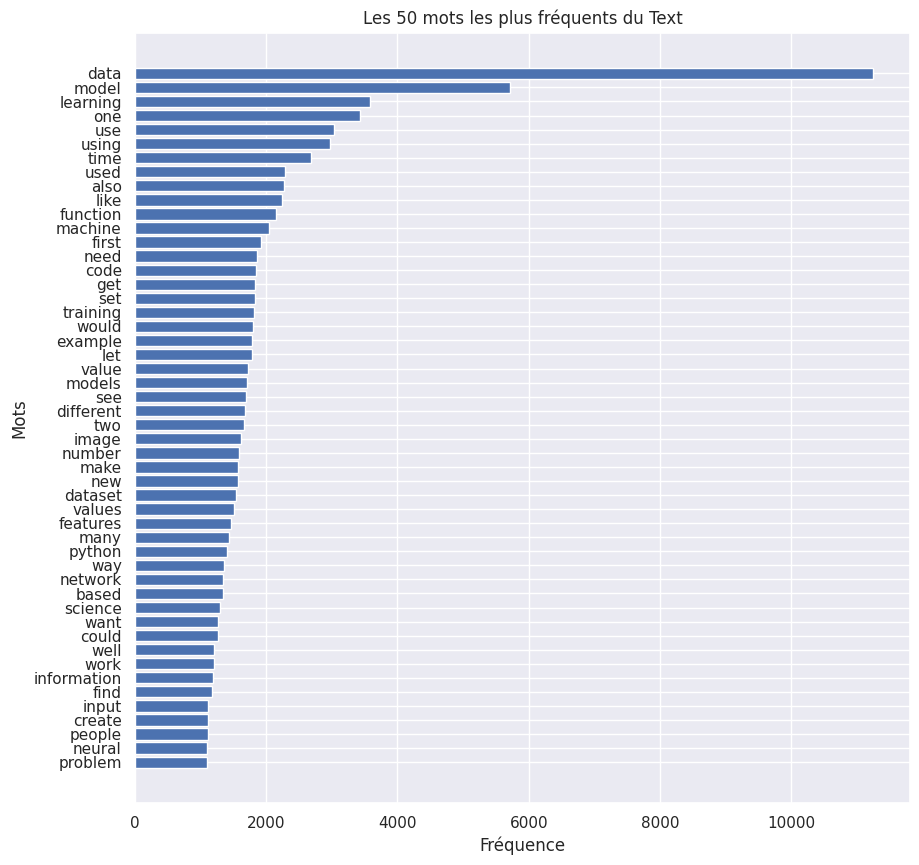

In [55]:
plt.figure(figsize=(10, 10))
plt.barh(mots, freq)
plt.xlabel('Fréquence')
plt.ylabel('Mots')
plt.title('Les 50 mots les plus fréquents du Text')
plt.gca().invert_yaxis()  
plt.show()

In [56]:
data['Title_clean'] = data['Title'].apply(clean_text)
data['Title_clean'] = data['Title_clean'].apply(tokenizer_fct)
data['Title_clean'] = data['Title_clean'].apply(remove_stop_word)

In [57]:
w = []
for i in range(len(data)):
    w.append(data['Title_clean'][i])
    
words = []
for t in w:
     words += t
freq_totale = Counter(words)

word_title = np.array(freq_totale.most_common(50))

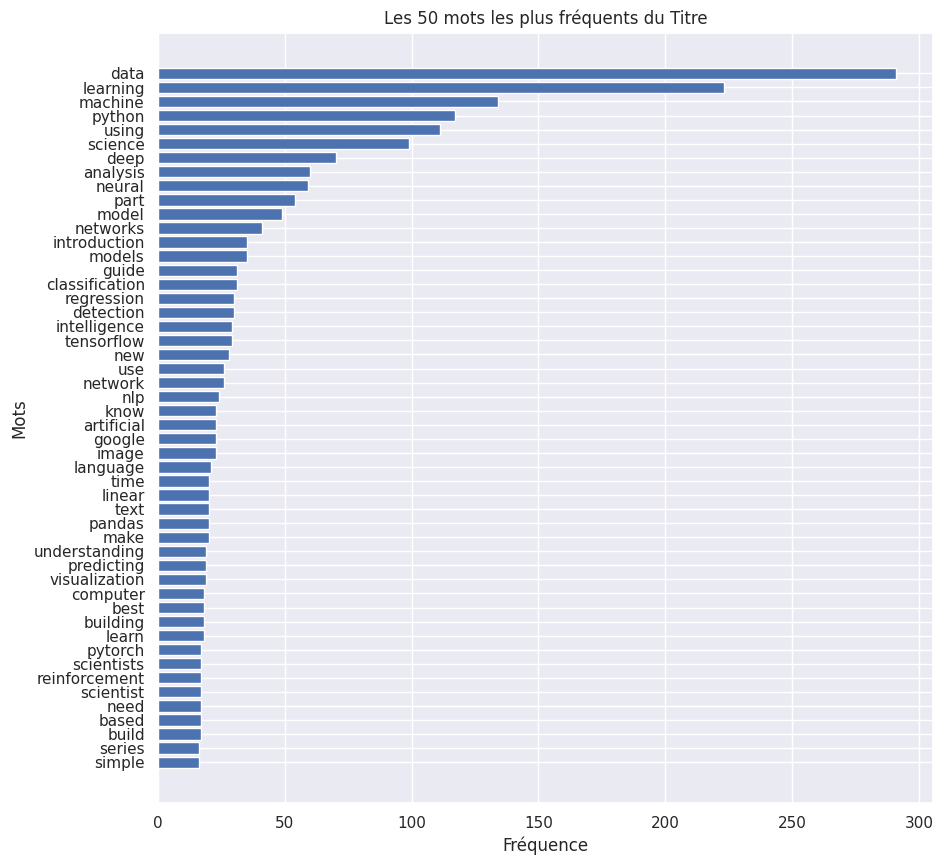

In [59]:
mots = word_title[:, 0]
freq = word_title[:, 1].astype(int)

plt.figure(figsize=(10, 10))
plt.barh(mots, freq)
plt.xlabel('Fréquence')
plt.ylabel('Mots')
plt.title('Les 50 mots les plus fréquents du Titre')
plt.gca().invert_yaxis()  
plt.show()

In [60]:
data

,Title,Text,text_char,Len_text,Len_title,Text_clean,Text_tokens,Text_tokens_clean,Title_clean
0,A Beginner’s Guide to Word Embedding with Gens...,1. Introduction of Word2vec\n\nWord2vec is one...,10559,1489,10,introduction of word2vec word2vec is one of t...,"[introduction, of, word2vec, word2vec, is, one...","[introduction, word2vec, word2vec, one, popula...","[beginner, guide, word, embedding, gensim, wor..."
1,Hands-on Graph Neural Networks with PyTorch & ...,"In my last article, I introduced the concept o...",829,139,9,"in my last article, i introduced the concept o...","[in, my, last, article, i, introduced, the, co...","[last, article, introduced, concept, graph, ne...","[hands, graph, neural, networks, pytorch, pyto..."
2,How to Use ggplot2 in Python,Introduction\n\nThanks to its strict implement...,5656,953,6,introduction thanks to its strict implementat...,"[introduction, thanks, to, its, strict, implem...","[introduction, thanks, strict, implementation,...","[use, ggplot2, python]"
3,Databricks: How to Save Data Frames as CSV Fil...,Photo credit to Mika Baumeister from Unsplash\...,1784,280,13,photo credit to mika baumeister from unsplash ...,"[photo, credit, to, mika, baumeister, from, un...","[photo, credit, mika, baumeister, unsplash, wo...","[databricks, save, data, frames, csv, files, l..."
4,A Step-by-Step Implementation of Gradient Desc...,A Step-by-Step Implementation of Gradient Desc...,4797,737,8,a step-by-step implementation of gradient desc...,"[a, step, by, step, implementation, of, gradie...","[step, step, implementation, gradient, descent...","[step, step, implementation, gradient, descent..."
...,...,...,...,...,...,...,...,...,...
1386,Brain: A Mystery,“The most beautiful experience we can have is ...,9644,1528,3,“the most beautiful experience we can have is ...,"[the, most, beautiful, experience, we, can, ha...","[beautiful, experience, mysterious, albert, ei...","[brain, mystery]"
1387,Machine Learning: Lincoln Was Ahead of His Time,Photo by Jp Valery on Unsplash\n\nIn the 45th ...,2641,429,8,photo by jp valery on unsplash in the 45th pr...,"[photo, by, jp, valery, on, unsplash, in, the,...","[photo, valery, unsplash, 45th, presidency, mu...","[machine, learning, lincoln, ahead, time]"
1388,AI and Us — an Opera Experience. In my previou...,EKHO COLLECTIVE: OPERA BEYOND SERIES\n\nIn my ...,2547,428,15,ekho collective: opera beyond series in my pr...,"[ekho, collective, opera, beyond, series, in, ...","[ekho, collective, opera, beyond, series, prev...","[opera, experience, previous, post, detailed]"
1389,Digital Skills as a Service (DSaaS),Have you ever thought about what will be in th...,1316,245,6,have you ever thought about what will be in th...,"[have, you, ever, thought, about, what, will, ...","[ever, thought, future, experience, skills, ge...","[digital, skills, service, dsaas]"


In [61]:
selected_df=data[data['Len_text']<=1000]
selected_df=selected_df.reset_index(drop=True)
selected_df.shape

(923, 9)

In [62]:
selected_df.to_csv("selected_df.csv", index=False)